In [ ]:
#Normalization is a technique often applied as part of data preparation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common scale, without distoring difference in the range of values or losing information

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df = pd.read_csv('../wine_data.csv', header =None, usecols=[0,1,2])
df.columns=['Class label', 'Alcohol','Malic acid']

In [12]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<AxesSubplot:xlabel='Alcohol', ylabel='Density'>

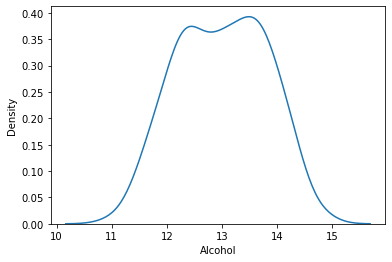

In [13]:
sns.kdeplot(df['Alcohol'])

<AxesSubplot:xlabel='Malic acid', ylabel='Density'>

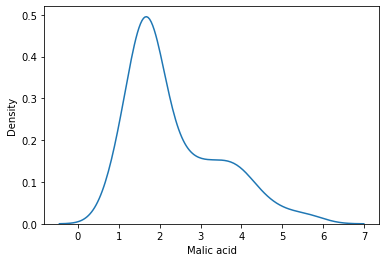

In [14]:
sns.kdeplot(df['Malic acid'])

/Users/sauravlamichhane/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Alcohol', ylabel='Malic acid'>

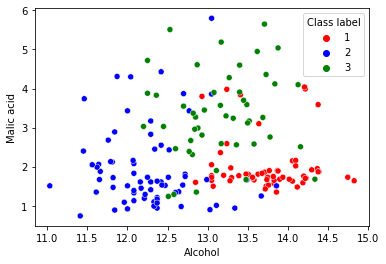

In [19]:
color_dict={1:'red', 3:'green', 2:'blue'}
sns.scatterplot(df['Alcohol'], df['Malic acid'], hue=df['Class label'], palette=color_dict)

In [21]:
#for doing the scaling we need to do this at list
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                   df['Class label'],
                                                   test_size=0.3,
                                                   random_state=0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)
#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
X_train_scaled= pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [32]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [33]:
np.round(X_train_scaled.describe(),1) #here we c

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0
